# Assignment 6: Nearest Neighbour and Artificial Neural Networks

## Objective of this assignment
The objective of this exercise is to understand how k-nearest neighbor and neural networks can be used to solve classification problems.

## ** Important: ** When handing in your homework:
+ Hand in the notebook (and nothing else) named as follows: StudentName1_snumber_StudentName2_snumber.ipynb
+ Provide clear and complete answers to the questions below under a separate header (not hidden somewhere in your source code), and make sure to explain your answers / motivate your choices. Add Markdown cells where necessary.
+ Source code, output graphs, derivations, etc., should be included in the notebook.
+ Hand-in: upload to Blackboard.
+ Include name, student number, assignment (especially in filenames)!
+ When working in pairs only one of you should upload the assignment, and report the name of your partner in your filename.
+ For problems or questions: use the BB discussion board or email the student assistants.


## Advised Reading and Exercise Material
**The following reading material is recommended:**

- Pang-Ning Tan, Michael Steinbach, and Vipin Kumar, *Introduction to Data Mining*, section 5.2-5.4.


## Additional Tools
For this exercise you will need to load the provided *mlp.py* script.

This exercise is based upon material kindly provided by the Cognitive System Section, DTU Compute, http://cogsys.compute.dtu.dk. Any sale or commercial distribution is strictly forbidden.

## Note: you will deal with a lot of different types data in this exercise! For quick inspection and easier debugging (including when you need to ask a TA for help) use the Spyder IDE and its Variable explorer tab.

##  6.1 K-nearest neighbor classification
In this exercise we will use the k-nearest neighbors (KNN) method for classification.
First, we will consider the four synthetic data sets synth1, synth2, synth3 and
synth4 we used in earlier assignments.

#### 6.1.1 (2 points)
For each of the four synthetic data sets, do the following. Load the complete dataset `X` and examine it by making a scatter plot, coloring the points by their class in `y`. Don't forget to add a legend. Classify the data `X` using the k-nearest neighbor classifier `KNeighborsClassifier` from `sklearn.neighbors` (http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). Choose a suitable distance measure (you should consider the distance measures `euclidean` and `cityblock`). Choose a suitable number of neighbors. Make another scatterplot of the new classification (with the best k-value and distance measures you found -- just one plot per data set is fine). Create the confusion matrix, plot it using the function given below, and calculate the accuracy and error rate from these numbers.

*Hints: To generate a confusion matrix, you can use the function confusion_matrix() from the module sklearn.metrics. You can use the function plot_confusion_matrix(cm,y) below to plot the confusion matrix. Don't remember how to read a confusion matrix? Check the wiki page: https://en.wikipedia.org/wiki/Confusion_matrix*

Which distance measures worked best for each of the four problems? Can you explain why? How many neighbors were needed for the four problems? Can you give
an example of when it would be good to use a large/small number of neighbors?
Consider e.g. when clusters are well separated versus when they are overlapping.


0.995


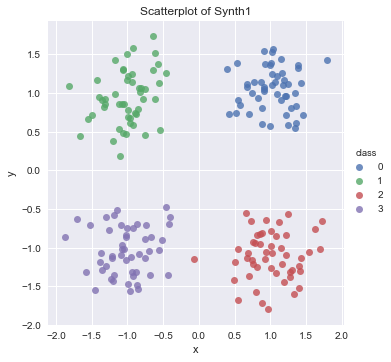

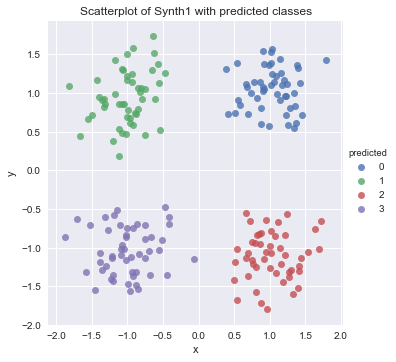

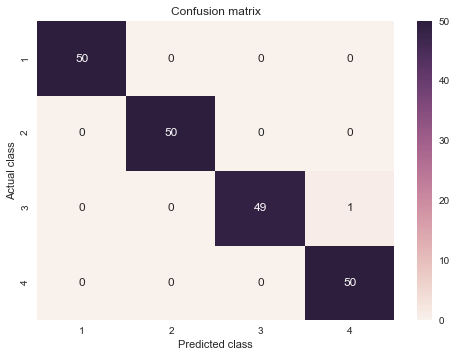

In [8]:
import seaborn as sn
import pandas as pd
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm,y):
    df_cm = pd.DataFrame(cm, index = [i+1 for i in np.unique(y)],
                  columns = [i+1 for i in np.unique(y)])
    plt.figure()
    sn.heatmap(df_cm, annot=True)
    plt.title('Confusion matrix')
    plt.xlabel('Predicted class')
    plt.ylabel('Actual class')
    plt.show()
    
def plotScatterplot(path, title, neighbors, method):
    syn = loadmat(path)
    X = syn['X']
    y = syn['y'].ravel()
    x_coord = []
    y_coord = []
    for i in range(0,len(X)):
        x_coord.append(X[i][0])
        y_coord.append(X[i][1])
    
    neigh = KNeighborsClassifier(n_neighbors=neighbors,p=method, metric='minkowski')
    neigh.fit(X, y)
    predicted = neigh.predict(X)
    print(neigh.score(X,y))
    
    # Create empty dataframe
    df = pd.DataFrame()

    # Add columns
    df['x'] = x_coord
    df['y'] = y_coord
    df['class'] = y
    df['predicted'] = predicted
    df.head()

    # Create scatterplot of dataframe
    sns.lmplot('x', # x axis
               'y', # y axis
               data=df, # Data source
               fit_reg=False, # No regression line
               hue="class") # Set color
           
    plt.title('Scatterplot of ' + title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
  
    
    # Create scatterplot with predicted classes
    sns.lmplot('x', # x axis
               'y', # y axis
               data=df, # Data source
               fit_reg=False, # No regression line
               hue="predicted") # Set color
    plt.title('Scatterplot of ' + title + ' with predicted classes')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    cm = confusion_matrix(y, predicted)
    plot_confusion_matrix(cm,y)
    
    
        
    
# Synth1 with k = 20 and Euclidean distance
plotScatterplot('Data/synth1.mat', "Synth1", 20, 2)

Accuracy: 199/200 = 0.995 = 99.5%
Error Rate: 1/200 = 0.005 = 0.5%

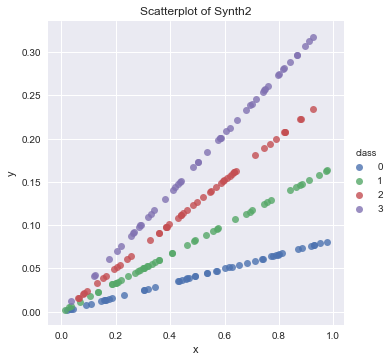

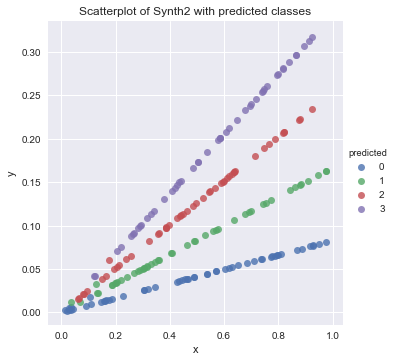

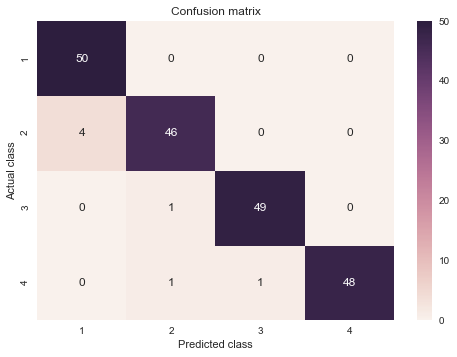

In [16]:
# Synth2 with k = 2 and Euclidean distance
plotScatterplot('Data/synth2.mat', "Synth2", 2, 2)

Accuracy: 193/200 = 0.965 = 96.5%
Error Rate: 7/200 = 0.035 = 3.5%

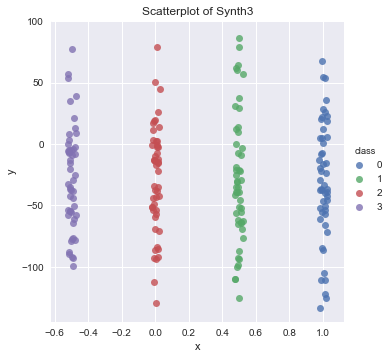

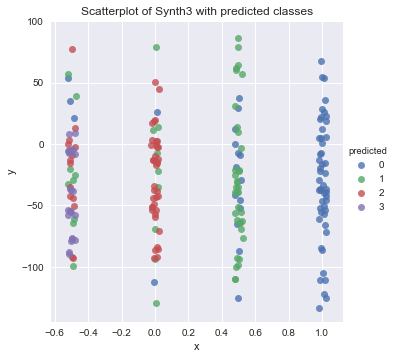

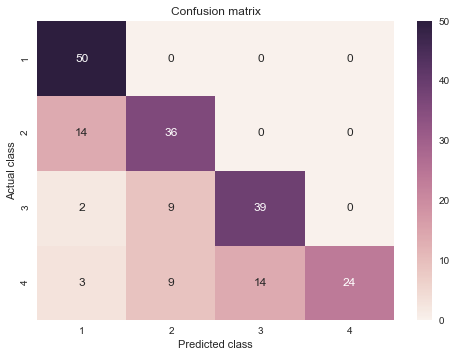

In [23]:
# Synth3 with k = 2 and Euclidean distance
plotScatterplot('Data/synth3.mat', "Synth3", 2, 1)

Accuracy: 141/200 = 0.705 = 70.5%
Error Rate: 59/200 = 0.295 = 29.5%

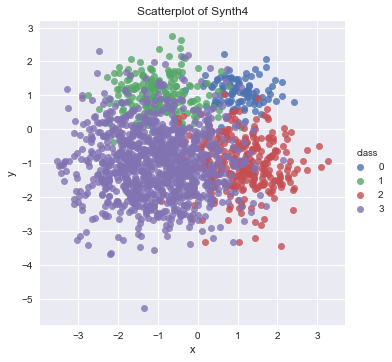

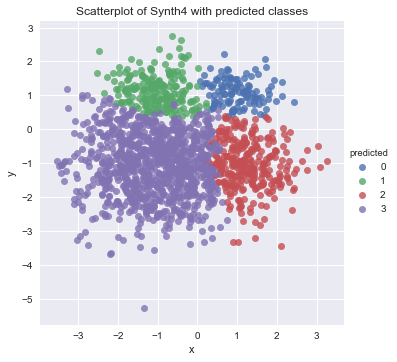

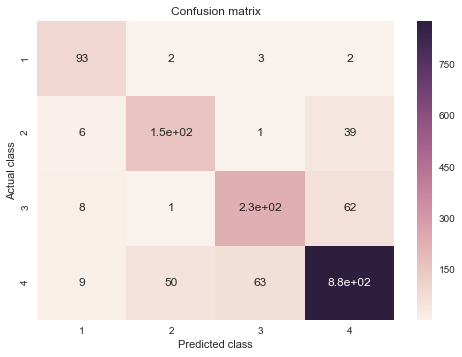

In [28]:
# Synth4 with k = 2 and Euclidean distance
plotScatterplot('Data/synth4.mat', "Synth4", 20, 2)

Accuracy: 1413/1600 = 0.883125 = 88.3%
Error Rate: 187/1600 = 0.116875 = 11.7%

## Answer:

##### Which distance measures worked best for each of the four problems? Can you explain why? 

Synth1: We use the Euclidean distanc measure, because it seems to work better and both dimensions are equally relevant.

Synth2: We use the Euclidean distanc measure, because it seems to work better and both dimensions are equally relevant.

Synth3: We use the Cityblock distanc measure, because with this measure high differences in one dimension are more relevant .

Synth4: We use the Euclidean distanc measure, because it seems to work better and both dimensions are equally relevant.

##### How many neighbors were needed for the four problems? 

Synth1: We set the amount of neighbors to 20, since to find the clusters it is best to consider the overall distribution. Thus we choose a big K.

Synth2: We set the amount of neighbors to 2, because even though there are 4 distinct clusters, they are really close to each other and overlap. Hence the distinction gets worse with a bigger K. Thus we choose a small K.

Synth3: We set the amount of neighbors to 2, because even though there are 4 distinct clusters, they are close to each other and with a bigger K the distinction gets worse. Thus we choose a small K.

Synth4: We set the amount of neighbors to 20, because the overall distribution coincides with the clusters, although they overlap a lot. Thus we choose a big K.

##### Can you give an example of when it would be good to use a large/small number of neighbors? 
When the clusters are well seperated, it would be good to choose a big K. A higher K averages more data points in each prediction and thus is more resilient to outliers. 
On the other hand, when the clusters are overlapping, it is best to choose a small K. Since it considers less data points it is "less aware" of the overall distribution. That means the fit is more flexible and the decision boundry is less smooth. 

#### 6.1.2 (1 points)
In general we can use cross-validation to select the optimal distance metric and
number of nearest neighbors k although this can be computationally expensive. We now return to the Iris data that we have considered in previous exercises, and will attempt to classify the Iris flowers using KNN. Load the Iris data into Python with the `pandas` function `read_excel()`. Inspect the data by printing the `head()`. Use the values of the 4 variables `Sepal Length,  Sepal Width,  Petal Length,  Petal Width` to create a data set `X`. Use the `Type` column to create the labels `y`. Use leave-one-out cross-validation to estimate the number of neighbors, k, for the k-nearest neighbor classifier. Plot the cross-validation average classification error as a function of k for $k = 1,..,40$.

You can use the function `LeaveOneOut` from `sklearn.model_selection`: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html

What is the optimal number of neighbors to use for this data?

In [30]:
iris = pd.read_excel('Data/iris.xls')
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [52]:
from sklearn.model_selection import LeaveOneOut

X = []
x = []
for i in range(0,len(iris['Type'])):
    x.append(iris['Sepal Length'][i])
    x.append(iris['Sepal Width'][i])
    x.append(iris['Petal Length'][i])
    x.append(iris['Petal Width'][i])
    X.append(x)
    x = []
y = np.array(iris['Type'])
X = np.array(X)
etest = []
etrain = []
errors_train_per_fold = {}
errors_test_per_fold = {}

loo = LeaveOneOut()
loo.get_n_splits(X)
for k in range(1,41):
    errors_train_per_fold[k] = []
    errors_test_per_fold[k] = []
    for train_index, test_index in loo.split(np.array(X)):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        neigh = KNeighborsClassifier(n_neighbors=k,p=2, metric='minkowski')
        neigh.fit(X_train, y_train)
        
        # Evaluate the performance of the trained model on the test data
        errors_test_per_fold[k].append((1-neigh.score(X_test, y_test, sample_weight=None))*100)
        errors_train_per_fold[k].append((1-neigh.score(X_train, y_train, sample_weight=None))*100)
    etrain.append(np.mean(np.array(errors_train_per_fold[k])))
    etest.append(np.mean(np.array(errors_test_per_fold[k])))

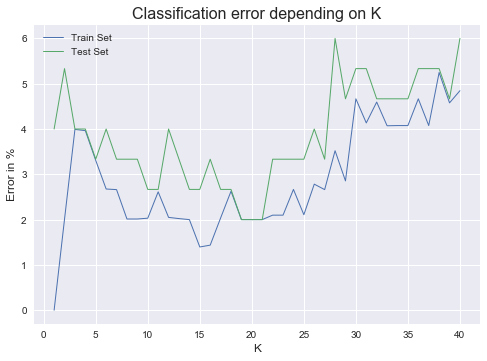

In [53]:
train, = plt.plot(np.array(range(1,41)), np.array(etrain), linewidth=1.0)
test, = plt.plot(np.array(range(1,41)), np.array(etest), linewidth=1.0)
plt.legend([train, test], ['Train Set', 'Test Set'])
plt.xlabel('K', fontsize=12)
plt.ylabel('Error in %', fontsize=12)
plt.title('Classification error depending on K', fontsize=16)
plt.show()

## Answers:
#### What is the optimal number of neighbors to use for this data?
The optimal number of neighbors is thus around 20, where the error is the smallest.

#### 6.1.3 (2 points)

KNN can also be used for regression by predicting the output of an observation
as the average of the output values of its nearest neighbors. Predict the alcohol content of wine in the `Wine` data with KNN, using the other 10 attributes as predictors (ie. 'nearest' is based on those 10 other attributes). Plot the mean squared error of the predictions compared to the actual alcohol content as a function of the number of nearest neighbors k for $k = 1,..,40$. What is the optimal value for the number of nearest neighbors?

Perform the regression on all observations; no need to do cross-validation here. 

*Hints: Use the `NearestNeighbors` class and the function `kneighbors()` to find the nearest neighbors -- check the doc and read what this function does.*
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html

*Make a matrix `X` containing the first 10 attributes, and a vector `alcohol` containing the 11th attribute. Fit `X`, and get indices of the 41 nearest neighbors from the `kneigbors()` function. Use these indices to create an Nx41 matrix containing the alcohol values of the 40 closest neigbors for each of the N wines.*

*Predict each observation as the mean of the alcohol content of its k nearest neighbors. Make sure you don't include the value for the observation itself!*

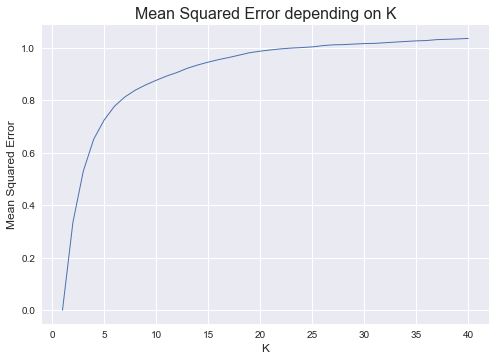

In [9]:
import numpy as np
from scipy.io import loadmat
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mean_squared_error

wine_data = loadmat('Data/wine.mat')
X_original = wine_data['X']

X = X_original[:,:10]
y = X_original[:,-1]
error = []
for k in range(1,41):
    neigh = NearestNeighbors(n_neighbors = k)
    neigh.fit(X)
    neighbors = neigh.kneighbors(X, n_neighbors=k, return_distance=False)
    y_pred = []
    for neighbor in neighbors:
        y_pred.append(np.mean(y[neighbor]))
    error.append(mean_squared_error(y, y_pred))
    
plt.plot(np.array(range(1,41)), np.array(error), linewidth=1.0)
plt.xlabel('K', fontsize=12)
plt.ylabel('Mean Squared Error', fontsize=12)
plt.title('Mean Squared Error depending on K', fontsize=16)
plt.show()

## Answers:
#### What is the optimal value for the number of nearest neighbors?
The optimal value for the number of nearest neighbors is 1, since it only increases afterwards.

## 6.2 Artificial Neural Networks

In this part of the exercise we will use neural networks to classify the xor data. We will consider a network with an input layer, one layer of hidden units and an output layer. The class MLP contained in the `mlp.py` file can be used to create a Multilayer Perceptron that can learn weights that minimize $W = \{W_o,W_h\}$ the objective function $E(X,y,(W_o,W_h)) = \sum_i (f(W_o*f(W_h*X_i)) - y_i)$ for any dataset X with corresponding labels y. We use the data contained in `xor.mat` in the Data folder. 

#### 6.2.1 (0.5 points)
Check out the MLP class in the Toolbox and read the documentation well. Make sure you understand at least in general terms how the learning process works. Answer the following questions before you continue:

1. For a single layer perceptron, the activation function can be linear, e.g. $f(x) = x$. However, the activation function used in the MLP class is the sigmoid function. Why does it not make sense for an MLP to use such a linear activation function? Hint: what does the following computation simplify to if $f(x)$ is such a simple linear function: $f(Wo*f(Wh*X_i))$?
2. The function that learns the weights W mentioned above is the function `learn_weights()` which has a few optional parameters. For each of the following parameters, explain how changing the parameter might affect the learning process or the resulting solution:

> `nhidden`:

> `nepochs`:

> `eta`:

   3\. Use the following commands to create a small test set:

> `Xtest = np.array([[0,0],[0,1],[1,0],[1,1]]).`

> `ytest = np.array([0,0,0,1]).reshape(4,1)`
     
   The command `perceptron = mlp.MLP(Xtest,ytest)` will create a instance of the MLP class. Now you can learn the weights for one hidden unit by using `wh,wo,c = perceptron.learn_weights()`. What are the weights after learning? And the classification error? use the function `perceptron.plot_boundaries(wh,wo,Xtest)` to plot the data and the decision boundaries. Why does(n't) it work well with one hidden unit? Could you improve by using more?

##### NOTE: the weights are initiated randomly -- if the result looks strange, it may help to run the learning process again.

Iteration: 0 / 8000 ; misclassication rate: 0.7500
Iteration: 500 / 8000 ; misclassication rate: 0.2500
Iteration: 1000 / 8000 ; misclassication rate: 0.0000
Iteration: 1500 / 8000 ; misclassication rate: 0.0000
Iteration: 2000 / 8000 ; misclassication rate: 0.0000
Iteration: 2500 / 8000 ; misclassication rate: 0.0000
Iteration: 3000 / 8000 ; misclassication rate: 0.0000
Iteration: 3500 / 8000 ; misclassication rate: 0.0000
Iteration: 4000 / 8000 ; misclassication rate: 0.0000
Iteration: 4500 / 8000 ; misclassication rate: 0.0000
Iteration: 5000 / 8000 ; misclassication rate: 0.0000
Iteration: 5500 / 8000 ; misclassication rate: 0.0000
Iteration: 6000 / 8000 ; misclassication rate: 0.0000
Iteration: 6500 / 8000 ; misclassication rate: 0.0000
Iteration: 7000 / 8000 ; misclassication rate: 0.0000
Iteration: 7500 / 8000 ; misclassication rate: 0.0000
Final misclassification rate: 0.0000


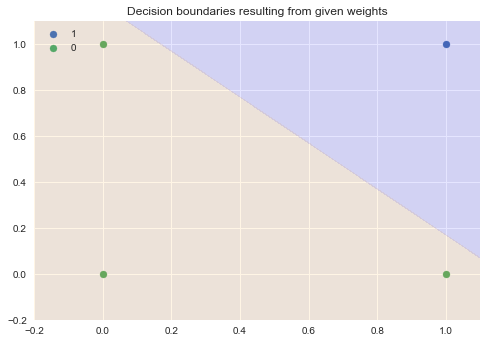

In [39]:
import mlp
import numpy as np

Xtest = np.array([[0,0],[0,1],[1,0],[1,1]])

ytest = np.array([0,0,0,1]).reshape(4,1)

perceptron = mlp.MLP(Xtest,ytest)

wh,wo,c = perceptron.learn_weights(1)

perceptron.plot_boundaries(wh,wo,Xtest)

## Answer:

With just one hidden unit we reach a final misclassification rate of 0 and consistens weights at about:

wh: 4.782573   -4.87954285 -4.87954254

wo: -6.19995282

Since the data can be seperated using only a single linear boundary one hidden unit is sufficient.
Any higher number of hidden units would only further complicate our model.

#### 6.2.2 (0.5 points)
Load the data from `xor.mat` into Python using `scipio.io.loadmat(...)` and make a scatter plot of the two attributes in `X`, coloring the points according to the class label `y`. How are `X` and `y` related?

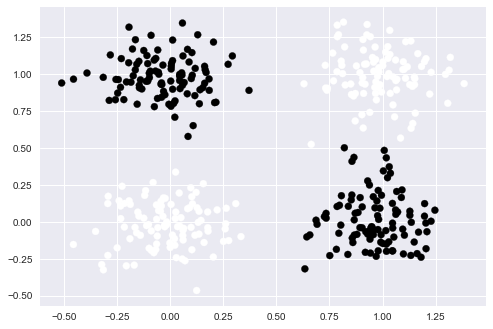

In [40]:
import scipy.io as scipio
import matplotlib.pyplot as plt

data = scipio.loadmat("Data/xor.mat")

X = data['X']
y = data['y']

x0 = X[:,0]
x1 = X[:,1]

plt.scatter(x0, x1, c=y)
plt.show()

## Answer:
y is true if the values in x0 or x1 are high (around 0.5 to 1.25). y is false if both x0 and x1 are high or if both x0 and x1 are low.

You will now use the MLP class to create and learn the weights of a mlp. The constructor `mlp.MLP(X,y)` takes 2 arguments, X and y. Save the instance you created in a variable `perceptron`. The function `learn_weights()` will return the weights between the input layer and hidden layer, `W_h`, the weights between the hidden layer and the output layer, `W_o`, and the classification error  


#### 6.2.3 (2 points)
Create a MLP using X and y. Learn the weights `Wh,Wo` using 1 hidden unit. Use 10-fold cross-validation `KFold` from `sklearn.model_selection` to create training and test sets and estimate the classification error for both. Since the algorithm doesn't always converge, restart the learning process 5 times in each fold and take the best classification error.  

You can get the training error from the `learn_weights()` function. Set the optional parameter `verbose=False` to prevent cluttering the output with print statements. The test error can be obtained by feeding the test data through the network using the function `forwardprop(W_h,W_o,X=X_test)`. `forwardprop` will then return a few variables (h,o,grad_h,grad_o, and y_hat), of which the last is the output of the network. You can compare this output `y_hat` to the actual labels in `y_test`. So:

>`_,_,_,_,y_hat = perceptron.forwardprop(Wh,Wo,X=X_test)
> test_error = ... #compare y_hat to y_test`




Plot the decision boundaries of one network trained on the entire data set, again with 1 hidden unit, and explain why the network performs so well/poorly.

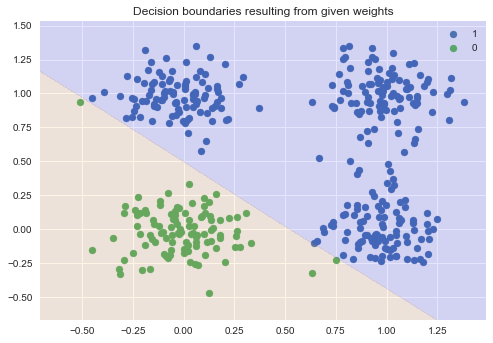

Train Error: 0.177777777778, Test Error: 1.0
Train Error: 0.177777777778, Test Error: 1.0
Train Error: 0.286111111111, Test Error: 0.0
Train Error: 0.291666666667, Test Error: 0.0
Train Error: 0.297222222222, Test Error: 0.0
Train Error: 0.280555555556, Test Error: 0.0
Train Error: 0.194444444444, Test Error: 1.0
Train Error: 0.280555555556, Test Error: 0.0
Train Error: 0.280555555556, Test Error: 0.0
Train Error: 0.280555555556, Test Error: 0.0


In [41]:
import mlp
from sklearn.model_selection import KFold

def function(nhidden):
    kf = KFold(10)

    perceptron = mlp.MLP(X, y)
    wh, wo, train_err = perceptron.learn_weights(nhidden, 10000, verbose=False)

    perceptron.plot_boundaries(wh, wo, X)

    for train, test in kf.split(X):
        min_test_err = 9999
        min_train_err = 0
        for i in range(0, 5):
            perceptron = mlp.MLP(X[train], y[train])
            wh, wo, train_err = perceptron.learn_weights(nhidden, 1000, verbose=False)
            
            _, _, _, _, result = perceptron.forwardprop(wh, wo, X = X[test])
            test_err = perceptron.class_error(y[test], result)

            if(test_err < min_test_err):
                min_test_err = test_err
                min_train_err = train_err

        print("Train Error: " + str(min_train_err) + ", Test Error: " + str(min_test_err))
function(1)

## Answer:
The network seems to perform reasonably well, judging by the train and test errors of the 10 fold cross validation. In reality it completely misclassifies a big chunk of data-points. This was to be expected with only a single linear boundary to adjust.

#### 6.2.4 
Repeat 6.2.3, but use two hidden units instead of one. Does the classification performance improve? Can you explain why?

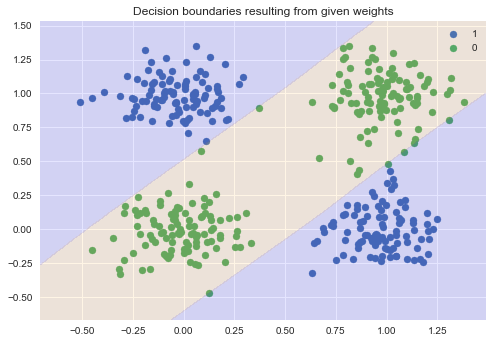

Train Error: 0.147222222222, Test Error: 0.0
Train Error: 0.0555555555556, Test Error: 0.025
Train Error: 0.00833333333333, Test Error: 0.0
Train Error: 0.0166666666667, Test Error: 0.0
Train Error: 0.0222222222222, Test Error: 0.0
Train Error: 0.0111111111111, Test Error: 0.0
Train Error: 0.0111111111111, Test Error: 0.0
Train Error: 0.0138888888889, Test Error: 0.0
Train Error: 0.00555555555556, Test Error: 0.025
Train Error: 0.166666666667, Test Error: 1.0


In [42]:
function(2)

## Answer:
The classification performance improves with an additional hidden unit. With just one intermediate the model was only able to seperate a single 'block' of data points linearly. The second unit can already result in near perfect classification of this particular dataset (although it might not reach that solution). Generally, the training and test error scores are lower since we have a more dynamic decision boundaries.

#### 6.2.5
Repeat 6.2.3 with 10 hidden units. What happens to the decision boundaries of the learned neural networks? What are the benefits and drawbacks of including
many hidden units in the network?

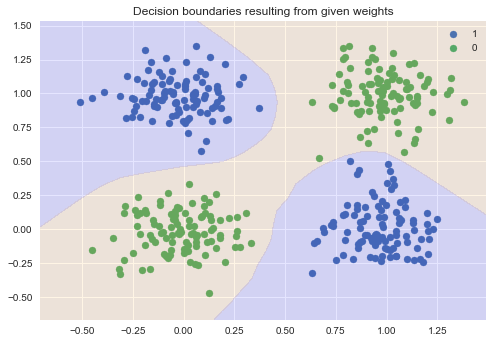

Train Error: 0.00555555555556, Test Error: 0.0
Train Error: 0.0, Test Error: 0.025
Train Error: 0.0, Test Error: 0.0
Train Error: 0.0, Test Error: 0.0
Train Error: 0.0, Test Error: 0.0
Train Error: 0.0, Test Error: 0.0
Train Error: 0.00277777777778, Test Error: 0.0
Train Error: 0.0, Test Error: 0.0
Train Error: 0.0, Test Error: 0.0
Train Error: 0.0, Test Error: 0.0


In [43]:
function(10)

## Answer:
Drawbacks of an increase in hidden units include a higher learning-time and higher model complexity. While the latter is not nessecarily a drawback it results in overfitting. The former can lead the model never fitting at all within reasonable time.